# Лабораторная работа №7 “Метод главных компонент”

In [475]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from mpl_toolkits import mplot3d
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import pandas as pd
import random
from PIL import Image
import imageio
from sklearn.decomposition import PCA as sklearnPCA
from stl import mesh
from matplotlib import cm

## Task 1

Набор данных ex7data1.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит две переменные X<sub>1</sub> и X<sub>2</sub> -
координаты точек, для которых необходимо выделить главные компоненты

1. Загрузите данные ex7data1.mat из файла.

In [350]:
task1_file_name = "Data\Lab 7\ex7data1.mat"
mat = loadmat(task1_file_name)  # load mat-file
X = mat['X']
X_std = StandardScaler().fit_transform(X)

In [351]:
X.shape

(300, 2)

2. Постройте график загруженного набора данных.

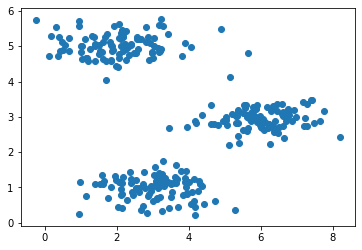

In [78]:
plt.scatter(X[:, 0], X[:, 1], cmap='winter')
plt.show()

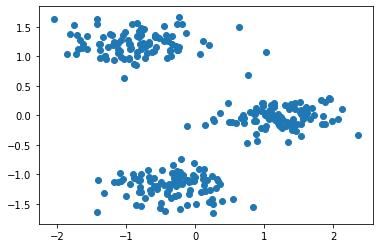

In [79]:
plt.scatter(X_std[:, 0], X_std[:, 1], cmap='winter')
plt.show()

3. Реализуйте функцию вычисления матрицы ковариации данных.

In [283]:
def compute_covariance_matrix(X):
    m=len(X)
    mu = np.mean(X,axis=0)
    return (1/(m-1))*np.dot((X-mu).T,(X-mu))

In [284]:
covariance_matrix = compute_covariance_matrix(X_std)

In [82]:
covariance_matrix

array([[ 1.00334448, -0.22255115],
       [-0.22255115,  1.00334448]])

In [144]:
covariance_matrix = np.cov(X_std)

4. Вычислите координаты собственных векторов для набора данных с
помощью сингулярного разложения матрицы ковариации (разрешается
использовать библиотечные реализации матричных разложений).

In [145]:
eigvals, eigvecs = np.linalg.eig(covariance_matrix)

In [147]:
eigvals.shape,eigvecs.shape

((300,), (300, 300))

In [285]:
u,s,v = np.linalg.svd(covariance_matrix)
u, s

(array([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]), array([1.22589563, 0.78079333]))

5. Постройте на графике из пункта 2 собственные векторы матрицы
ковариации

In [294]:
mu = np.mean(X_std,axis=0)

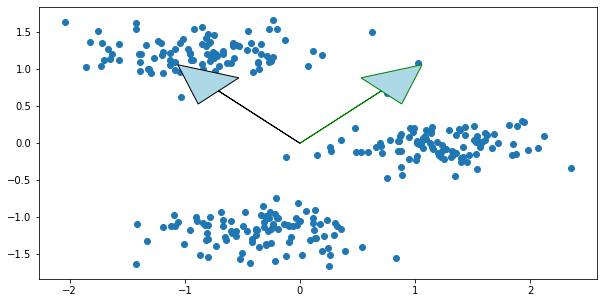

In [301]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.arrow(mu[0], mu[1], u[0,0], u[0,1], head_width=0.5, head_length=0.5, fc='lightblue', ec='black')
ax.arrow(mu[0], mu[1], u[1,0], u[1,1], head_width=0.5, head_length=0.5, fc='lightblue', ec='green')
plt.scatter(X_std[:, 0], X_std[:, 1], cmap='winter')
plt.show()

6. Реализуйте функцию проекции из пространства большей размерности в
пространство меньшей размерности с помощью метода главных
компонент.

In [309]:
def pca_transform (X, k):
    covariance_matrix = compute_covariance_matrix(X)
    u_reduce = u[:,:k]
    return X.dot(u_reduce), u_reduce

In [310]:
new_X, u_reduce = pca_transform(X_std, 1)

In [151]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [152]:
print(sklearn_pca.explained_variance_ratio_)
print(sklearn_pca.singular_values_)

[0.61090466 0.38909534]
[19.14530738 15.27930644]


In [153]:
sklearn_pca.inverse_transform(Y_sklearn)

array([[-9.58347985e-01,  9.63266026e-01],
       [ 1.02696731e+00,  1.07763101e+00],
       [ 1.38797849e+00,  1.80562106e-01],
       [-4.05936673e-01,  9.66019756e-01],
       [-2.35333079e-01,  1.16081042e+00],
       [-1.26742373e+00,  1.15652121e+00],
       [-8.88580159e-01,  8.60621889e-01],
       [-7.54192417e-01,  1.22951391e+00],
       [-3.64638072e-01,  1.10170566e+00],
       [-3.66564689e-01,  1.08164152e+00],
       [-8.16395562e-01,  1.41870157e+00],
       [-8.12893983e-01,  1.32050447e+00],
       [-1.12882881e+00,  1.05983893e+00],
       [-7.87874383e-01,  1.35962515e+00],
       [-1.69887057e+00,  1.12706499e+00],
       [-6.31429356e-01,  1.08014273e+00],
       [ 1.95756504e-01,  1.19359033e+00],
       [-3.52319002e-01,  1.00571230e+00],
       [-1.56996709e+00,  1.12038012e+00],
       [-2.71638671e-01,  1.09939863e+00],
       [-1.65047769e+00,  1.14335492e+00],
       [-2.86155364e-01,  1.17382089e+00],
       [-8.50321539e-01,  1.56755048e+00],
       [-1.

7. Реализуйте функцию вычисления обратного преобразования.

In [314]:
def inverse_pca_transform(X, u_reduce):
    return X.dot(u_reduce.T)

In [315]:
new_XY = inverse_pca_transform(new_X, u_reduce)
# new_X = sklearn_pca.inverse_transform(Y_sklearn)

8. Постройте график исходных точек и их проекций на пространство
меньшей размерности (с линиями проекций).

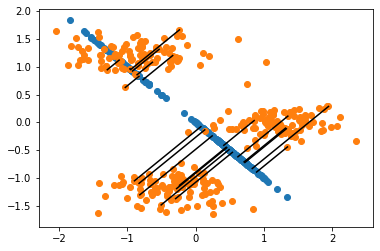

In [327]:
plt.scatter(new_XY[:, 0], new_XY[:, 1], cmap='winter')
plt.scatter(X_std[:, 0], X_std[:, 1], cmap='winter')
for i in range(0, X_std.shape[0], 15):
    plt.plot([X_std[i, 0], new_XY[i, 0]],[X_std[i, 1], new_XY[i, 1]],'k-')
plt.show()

## Task 2

Набор данных ex7faces.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит 5000 изображений 32x32 в
оттенках серого. Каждый пиксель представляет собой значение яркости
(вещественное число). Каждое изображение сохранено в виде вектора из 1024
элементов. В результате загрузки набора данных должна быть получена
матрица 5000x1024.

9.Загрузите данные ex7faces.mat из файла

In [339]:
task2_file_name = "Data\Lab 7\ex7faces.mat"
mat = loadmat(task2_file_name)  # load mat-file
X = mat['X']

In [168]:
np.min(X), np.max(X)

(-127.8663138671875, 127.1336861328125)

10.Визуализируйте 100 случайных изображений из набора данных.

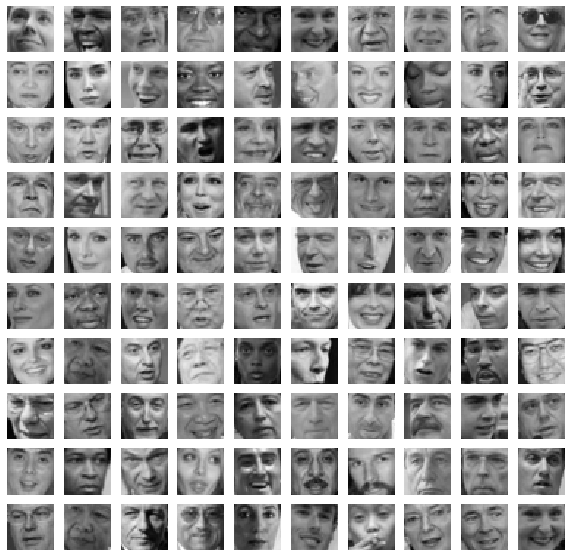

In [329]:
fig, ax = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X[np.random.randint(X.shape[0])].reshape((32,32), order = 'F'), vmin=-127, vmax=127, cmap='gray')          
        ax[i,j].axis('off')

11.С помощью метода главных компонент вычислите собственные
векторы.

In [330]:
covariance_matrix = compute_covariance_matrix(X)
u,s,v = np.linalg.svd(covariance_matrix)
u

array([[-0.0204473 , -0.04609067, -0.03992254, ...,  0.00079388,
         0.00059184,  0.00071196],
       [-0.02082927, -0.04794968, -0.04100448, ..., -0.00142192,
        -0.00163027, -0.00177332],
       [-0.02088808, -0.04946636, -0.04327971, ...,  0.00790348,
         0.00054428,  0.0015138 ],
       ...,
       [-0.01429868,  0.04182147, -0.07918063, ..., -0.00302163,
         0.00403281,  0.00483352],
       [-0.01279079,  0.03972965, -0.0791031 , ...,  0.00043317,
        -0.00190278, -0.00177217],
       [-0.01186197,  0.03786644, -0.07711544, ...,  0.00229648,
         0.00057428,  0.00074233]])

In [183]:
sklearn_pca = sklearnPCA(n_components=36)
Y_sklearn = sklearn_pca.fit_transform(X)
new_X = sklearn_pca.inverse_transform(Y_sklearn)

12.Визуализируйте 36 главных компонент с наибольшей дисперсией.

In [340]:
new_X, u_reduce = pca_transform(X, 36)
new_XY = inverse_pca_transform(new_X, u_reduce)

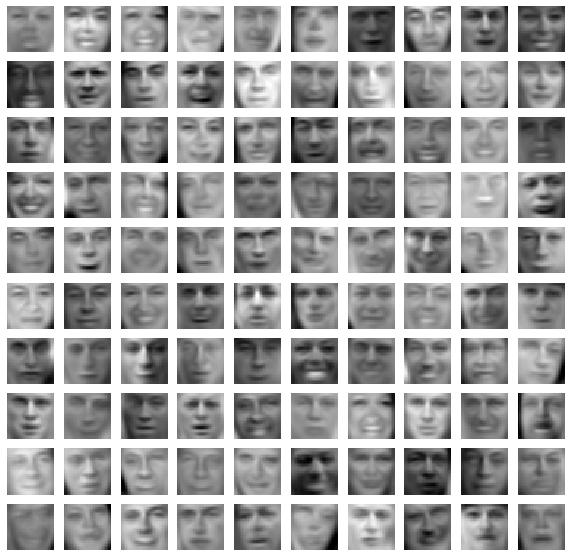

In [345]:
fig, ax = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(new_XY[np.random.randint(new_XY.shape[0])].reshape((32,32), order = 'F'), vmin=-127, vmax=127, cmap='gray')          
        ax[i,j].axis('off')

13.Как изменилось качество выбранных изображений?

Изобажения стали размытыми, качество ухудшилось.

14.Визуализируйте 100 главных компонент с наибольшей дисперсией.

In [346]:
new_X, u_reduce = pca_transform(X, 100)
new_XY = inverse_pca_transform(new_X, u_reduce)

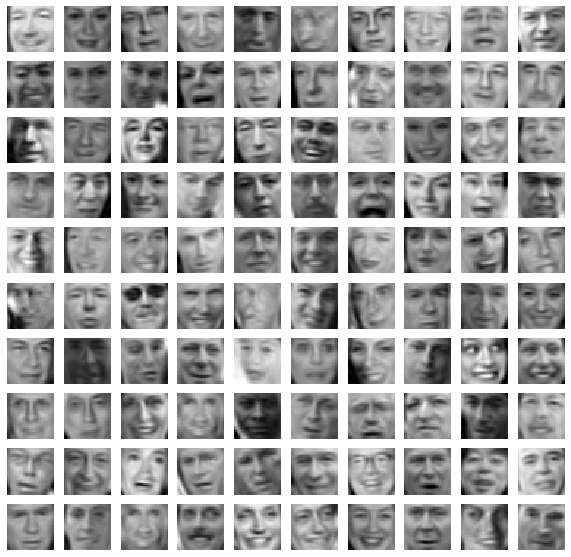

In [347]:
fig, ax = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(new_XY[np.random.randint(new_XY.shape[0])].reshape((32,32), order = 'F'), vmin=-127, vmax=127, cmap='gray')          
        ax[i,j].axis('off')

15.Как изменилось качество выбранных изображений?

Качество улучшилось.

16.Используйте изображение, сжатое в лабораторной работе №6.

In [488]:
luntik_file_name = r"Data\Lab 6\download.png"

In [492]:
img = Image.open(luntik_file_name).convert('LA')
luntik_arr = np.array(img)[:,:,0]

In [493]:
luntik_arr.shape

(450, 572)

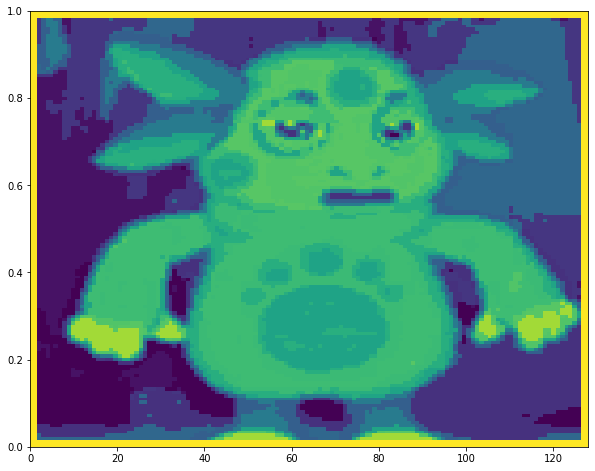

In [494]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(luntik_arr,extent=[0,128,0,1], aspect=100)
plt.show()

17.С помощью метода главных компонент визуализируйте данное
изображение в 3D и 2D

In [499]:
new_X, u_reduce = pca_transform(luntik_arr, 3)
new_XY = inverse_pca_transform(new_X, u_reduce)

ValueError: shapes (450,572) and (3,3) not aligned: 572 (dim 1) != 3 (dim 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


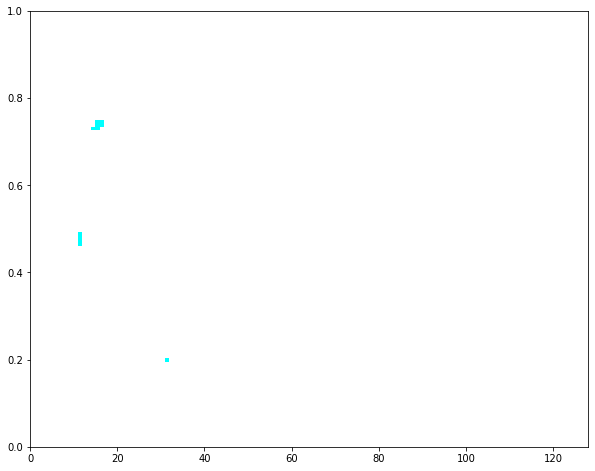

In [487]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(new_XY,extent=[0,128,0,1], aspect=100)
plt.show()

In [266]:
sklearn_pca = sklearnPCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(luntik_arr)
new_X = sklearn_pca.inverse_transform(Y_sklearn)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [275]:
X, Y, Z = np.mgrid[-10:10:100j, -10:10:100j, -10:10:100j]
data = np.sin(X*Y*Z)/(X*Y*Z)
data.shape

(100, 100, 100)

In [1]:
ms = np.linspace(-10.0,10.0, 100)
bs = np.linspace(-10.0,10.0, 100)

M, B = np.meshgrid(ms, bs)

zs=[]
for t in zip(np.ravel(M), np.ravel(B)):
    t = np.array(t)
    res = np.mean(np.sin(t+5))
    zs.append(res)
zs = np.array(zs)
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.set_xlabel('θ1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('θ2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('J(θ)', labelpad=30, fontsize=24, fontweight='bold')
# ax.set_title(' min(θ1, θ2)={0:.2f};{1:.2f} '.format(theta[0].item(), theta[1].item()))
ax.view_init()

NameError: name 'np' is not defined

In [282]:
M.shape, B.shape, Z.shape

((100, 100), (100, 100), (100, 100))

In [354]:
X = np.array([M.flatten(), B.flatten(), Z.flatten()]).T

In [355]:
X.shape

(10000, 3)

In [356]:
new_X, u_reduce = pca_transform(X, 2)
# new_XY = inverse_pca_transform(new_X, u_reduce)

ValueError: shapes (10000,3) and (1024,2) not aligned: 3 (dim 1) != 1024 (dim 0)

In [361]:
covariance_matrix = compute_covariance_matrix(X)
u,s,v = np.linalg.svd(covariance_matrix)
u, s
u_reduce = u[:,:2]
new_XY = X.dot(u_reduce)

In [362]:
new_XY.shape

(10000, 2)

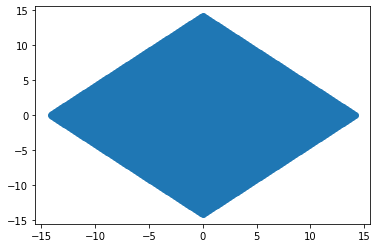

In [364]:
plt.scatter(new_XY[:, 0], new_XY[:, 1], cmap='winter')
plt.show()

In [390]:
import nibabel
# Read the image 
struct = nibabel.load(r"Data\Lab 6\nsM00587_0002.hdr")
struct_arr = struct.get_data()

In [391]:
struct_arr.shape

(157, 189, 68)

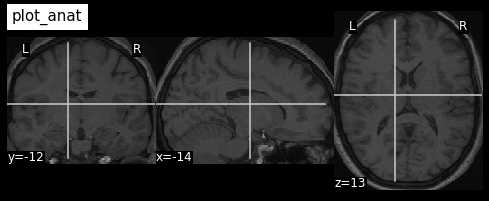

In [400]:
from nilearn import plotting

plotting.plot_anat(struct, title="plot_anat")

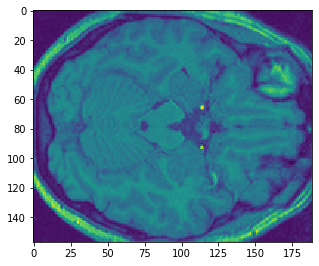

In [403]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.imshow(struct_arr[:, :, 15])
plt.show()

In [450]:
struct_arr

array([[[ 4.375,  4.75 ,  4.75 , ...,  0.   ,  0.   ,  0.   ],
        [ 1.75 ,  7.625,  2.875, ...,  0.   ,  0.   ,  0.   ],
        [ 4.5  ,  7.25 ,  3.875, ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 4.25 ,  7.   ,  4.   , ...,  1.5  ,  1.5  ,  1.625],
        [ 4.5  ,  2.625,  4.875, ...,  1.125,  4.125,  3.75 ],
        [ 3.875,  3.625,  4.125, ...,  2.625,  5.5  ,  3.25 ]],

       [[ 4.875,  5.5  ,  5.875, ...,  0.   ,  0.   ,  0.   ],
        [ 2.375,  3.5  ,  4.625, ...,  0.   ,  0.   ,  0.   ],
        [ 8.625,  2.375,  5.   , ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 3.25 ,  4.625,  3.625, ...,  1.625,  2.375,  3.375],
        [ 4.25 ,  4.375,  5.625, ...,  1.375,  4.5  ,  2.25 ],
        [ 5.125,  1.5  ,  4.   , ...,  1.625,  5.125,  3.875]],

       [[ 4.125,  5.375,  5.375, ...,  0.   ,  0.   ,  0.   ],
        [ 3.375,  5.   ,  3.125, ...,  0.   ,  0.   ,  0.   ],
        [ 6.25 ,  1.125,  4.75 , ...,  0.   ,  0.   ,  0.   ],
        ...,
        [ 1.

In [438]:
x_len, y_len, z_len = struct_arr.shape

In [439]:
x_len, y_len, z_len

(157, 189, 68)

In [443]:
new_X = np.zeros(shape=(x_len*y_len*z_len, 3))

In [448]:
new_X = []

In [454]:
for i in range(x_len):
    for j in range(y_len):
        for k in range(z_len):
            new_X.append(struct_arr[i, j, k])

In [456]:
new_X

[4.375,
 4.75,
 4.75,
 6.0,
 2.25,
 6.875,
 1.5,
 3.125,
 7.625,
 6.75,
 5.5,
 7.625,
 5.0,
 10.75,
 7.75,
 4.125,
 4.625,
 2.75,
 7.25,
 2.375,
 2.75,
 3.375,
 6.875,
 10.375,
 8.25,
 8.875,
 10.875,
 6.0,
 8.0,
 6.0,
 6.125,
 13.5,
 10.75,
 12.0,
 10.75,
 10.0,
 9.375,
 6.75,
 8.0,
 9.75,
 9.5,
 13.25,
 14.875,
 15.625,
 11.75,
 10.25,
 8.125,
 10.75,
 11.875,
 13.75,
 17.875,
 10.25,
 7.375,
 4.875,
 5.375,
 4.625,
 4.875,
 3.0,
 5.375,
 6.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.75,
 7.625,
 2.875,
 6.125,
 2.375,
 7.625,
 1.25,
 6.0,
 5.5,
 4.75,
 2.875,
 3.375,
 7.875,
 2.75,
 3.625,
 3.0,
 6.0,
 4.875,
 3.625,
 7.125,
 6.25,
 3.125,
 6.125,
 4.0,
 7.875,
 6.75,
 7.75,
 7.75,
 10.0,
 7.125,
 10.0,
 14.375,
 10.875,
 10.375,
 11.125,
 13.125,
 7.0,
 10.125,
 6.125,
 8.0,
 11.625,
 15.875,
 11.875,
 16.0,
 16.25,
 11.25,
 11.125,
 6.375,
 12.375,
 14.5,
 20.75,
 15.625,
 10.25,
 10.5,
 8.625,
 4.75,
 6.5,
 4.75,
 3.875,
 6.875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
new_X np.array(new_X)

In [455]:
new_X.shape

AttributeError: 'list' object has no attribute 'shape'

In [422]:
arr = np.random.randint(0, 1000, (5, 5, 6))
print(arr.shape)
df = pd.DataFrame(arr.reshape(-1, 6), columns=list('ABC'))
df.index = np.repeat(np.arange(arr.shape[0]), arr.shape[1]) + 1
df.index.name = 'Date'
print(df.shape)

(5, 5, 6)


ValueError: Shape of passed values is (25, 6), indices imply (25, 3)

In [412]:
pan = pd.Panel(struct_arr)
df = pan.swapaxes(0, 2).to_frame()
df.index = df.index.droplevel('minor')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


In [451]:
new_img = struct_arr.reshape((struct_arr.shape[0]*struct_arr.shape[1]), struct_arr.shape[2])

In [452]:
new_img.shape

(29673, 68)

In [453]:
np.meshgrid(new_img[:], new_img[1]).shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
np.meshgrid

In [ ]:
new_X, u_reduce = pca_transform(new_img.T, 10000)
new_XY = inverse_pca_transform(new_X, u_reduce)

18.Соответствует ли 2D изображение какой-либо из проекций в 3D?